In [13]:
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

Purpose: Reads the order book data from a JSON file and structures it into a DataFrame.

In [14]:
def parse_order_book_data(file_path):
    """
    Parse order book data from the given JSON file.
    """
    data_list = []
    with open(file_path, 'r') as f:
        data = json.load(f)

    # Extract the 'data' array
    entries = data['data']

    for entry in entries:
        timestamp = entry['time_received']  # Assuming this is the timestamp
        # Convert timestamp string to datetime object
        timestamp = datetime.strptime(timestamp, '%H:%M:%S.%f')

        # Extract bids and asks
        bids = entry.get('bids', [])  # Each bid is [price, size]
        asks = entry.get('asks', [])  # Each ask is [price, size]

        data_list.append({
            'timestamp': timestamp,
            'bids': bids,
            'asks': asks
        })

    # Create DataFrame
    order_book_df = pd.DataFrame(data_list)
    return order_book_df

### checking parse orderbook function

In [15]:
# File paths
order_book_file = '/root/trading_systems/kucoin_dir/kucoin_release_data_initial/2024-12-02_10-00_QUILL/QUILL_level2Depth5_data.json'
match_data_file = '/root/trading_systems/kucoin_dir/kucoin_release_data_initial/2024-12-02_10-00_QUILL/QUILL_match_data.json'

df_level2deep5 = parse_order_book_data(order_book_file)

Locator attempting to generate 1319 ticks ([-25566.584016203702, ..., -25566.568761574075]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1319 ticks ([-25566.584016203702, ..., -25566.568761574075]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1319 ticks ([-25566.584016203702, ..., -25566.568761574075]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1319 ticks ([-25566.584016203702, ..., -25566.568761574075]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1319 ticks ([-25566.584016203702, ..., -25566.568761574075]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1319 ticks ([-25566.584016203702, ..., -25566.568761574075]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1319 ticks ([-25566.584016203702, ..., -25566.568761574075]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1319 ticks ([-25566.584016203702, ..., -25566

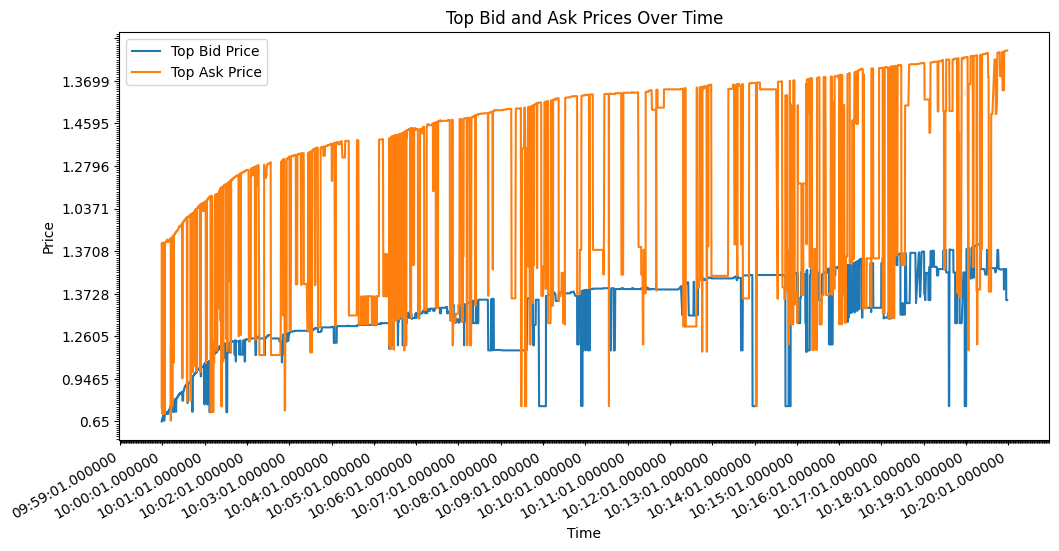

In [35]:

# Cell 4: Extract Top Bid and Ask Prices
timestamps = []
top_bid_prices = []
top_ask_prices = []

for index, row in df_level2deep5.iterrows():
    timestamp = row['timestamp']
    bids = row['bids']
    asks = row['asks']
    
    if bids:
        top_bid_price = max([price for price, size in bids])
    else:
        top_bid_price = None
    
    if asks:
        top_ask_price = min([price for price, size in asks])
    else:
        top_ask_price = None
    
    timestamps.append(timestamp)
    top_bid_prices.append(top_bid_price)
    top_ask_prices.append(top_ask_price)

# Cell 5: Create DataFrame for Top Prices
df_top_prices = pd.DataFrame({
    'timestamp': timestamps,
    'top_bid_price': top_bid_prices,
    'top_ask_price': top_ask_prices
})

df_top_prices['timestamp'] = pd.to_datetime(df_top_prices['timestamp'])
df_top_prices =df_top_prices
# Cell 6: Plot the Top Bid and Ask Prices Over Time
plt.figure(figsize=(12, 6))
plt.plot(df_top_prices['timestamp'], df_top_prices['top_bid_price'], label='Top Bid Price')
plt.plot(df_top_prices['timestamp'], df_top_prices['top_ask_price'], label='Top Ask Price')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Top Bid and Ask Prices Over Time')
plt.legend()

# Set major and minor ticks format for y-axis
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(100))  # Major ticks every 10 units
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(5))   # Minor ticks every 5 units

# Format x-axis to show time properly
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=60))  # Major ticks every 2 seconds
plt.gca().xaxis.set_minor_locator(mdates.SecondLocator(interval=1))  # Minor ticks every 1 second
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S.%f'))  # Format major ticks as HH:MM:SS
plt.gcf().autofmt_xdate()

plt.show()

Purpose: Reads the trade data from a JSON file and structures it into a DataFrame.

In [17]:
def parse_match_data(file_path):
    """
    Parse match data from the given JSON file.
    """
    data_list = []
    with open(file_path, 'r') as f:
        data = json.load(f)

    # Extract the 'data' array
    entries = data['data']

    for entry in entries:
        timestamp = entry['time_received']  # Assuming this is the timestamp
        # Convert timestamp string to datetime object
        timestamp = datetime.strptime(timestamp, '%H:%M:%S.%f')

        price = float(entry['price'])
        size = float(entry['size'])
        side = entry['side']

        data_list.append({
            'timestamp': timestamp,
            'price': price,
            'size': size,
            'side': side
        })

    # Create DataFrame
    match_data_df = pd.DataFrame(data_list)
    return match_data_df

In [18]:
parse_match_data(match_data_file)


,timestamp,price,size,side
0,1900-01-01 10:00:00.103700,0.6000,1.00,sell
1,1900-01-01 10:00:00.104200,0.6444,57.90,buy
2,1900-01-01 10:00:00.104300,0.6889,101.20,buy
3,1900-01-01 10:00:00.115300,0.7333,146.95,buy
4,1900-01-01 10:00:00.126000,0.7778,173.97,buy
...,...,...,...,...
4326,1900-01-01 10:19:54.510600,1.3625,1.46,sell
4327,1900-01-01 10:19:54.510600,1.3583,20.97,sell
4328,1900-01-01 10:19:54.510700,1.3530,2.22,sell
4329,1900-01-01 10:19:55.025700,1.3627,18.83,buy


Purpose: Calculates key order book metrics and retrieves the top N bids and asks for each timestamp.

In [19]:
def calculate_order_book_metrics(order_book_df, N):
    """
    Calculate bid pressure, ask pressure, and imbalance for the order book.
    """
    metrics_list = []

    for index, row in order_book_df.iterrows():
        timestamp = row['timestamp']
        bids = row['bids']
        asks = row['asks']

        # Convert bids and asks to DataFrames
        bids_df = pd.DataFrame(bids, columns=['price', 'size'])
        asks_df = pd.DataFrame(asks, columns=['price', 'size'])

        # Ensure 'size' is numeric
        bids_df['size'] = bids_df['size'].astype(float)
        asks_df['size'] = asks_df['size'].astype(float)

        # Sort bids descending by price and get top N
        top_bids_df = bids_df.sort_values(by='price', ascending=False).head(N)

        # Sort asks ascending by price and get top N
        top_asks_df = asks_df.sort_values(by='price', ascending=True).head(N)

        # Calculate bid pressure and ask pressure
        bid_pressure = top_bids_df['size'].sum()
        ask_pressure = top_asks_df['size'].sum()

        # Calculate imbalance
        total_pressure = bid_pressure + ask_pressure
        if total_pressure != 0:
            imbalance = (bid_pressure - ask_pressure) / total_pressure
        else:
            imbalance = np.nan

        metrics_list.append({
            'timestamp': timestamp,
            'bid_pressure': bid_pressure,
            'ask_pressure': ask_pressure,
            'imbalance': imbalance,
            'top_bids': top_bids_df,
            'top_asks': top_asks_df
        })

    # Create DataFrame with metrics
    metrics_df = pd.DataFrame(metrics_list)
    return metrics_df

In [20]:
calculate_order_book_metrics(parse_order_book_data(order_book_file), 5).head()

,timestamp,bid_pressure,ask_pressure,imbalance,top_bids,top_asks
0,1900-01-01 10:00:00.123600,5689.93,1104.53,0.674873,price size 0 0.65 700.00 1 0....,price size 0 0.7333 146.95 1 0.7778 ...
1,1900-01-01 10:00:00.149500,5689.93,1104.53,0.674873,price size 0 0.65 700.00 1 0....,price size 0 0.7333 146.95 1 0.7778 ...
2,1900-01-01 10:00:00.207400,40931.99,1936.82,0.909640,price size 0 1.1 1080.00 1 ...,price size 0 1.3143 372.44 1 1.3429 ...
3,1900-01-01 10:00:00.313200,38091.00,1936.82,0.903226,price size 0 1.1 1080.0 1 ...,price size 0 1.3143 372.44 1 1.3429 ...
4,1900-01-01 10:00:00.423600,10135.00,2341.20,0.624693,price size 0 1.5 5253.0 1 1.2229 ...,price size 0 1.55 58.10 1 1.575 47...


Purpose: Aggregates trade data over fixed intervals to compute metrics.

In [21]:
def calculate_match_data_metrics(match_data_df, interval_ms):
    """
    Calculate trade volume and trade speed for the match data.
    """
    # Set timestamp as index
    match_data_df = match_data_df.set_index('timestamp')

    # Resample data into intervals
    resampled_df = match_data_df.resample(f'{interval_ms}ms').agg({
        'size': 'sum',       # Total trade volume
        'price': 'mean',     # Average price (optional)
        'side': 'count'      # Number of trades
    }).rename(columns={'size': 'trade_volume', 'side': 'trade_speed'})

    resampled_df = resampled_df.reset_index()
    return resampled_df

In [22]:
def synchronize_data(order_book_metrics_df, match_metrics_df):
    """
    Merge order book metrics and match data metrics on timestamp.
    """
    # Merge the DataFrames on timestamp
    merged_df = pd.merge_asof(
        order_book_metrics_df.sort_values('timestamp'),
        match_metrics_df.sort_values('timestamp'),
        on='timestamp',
        direction='nearest',
        tolerance=timedelta(milliseconds=50)
    )
    return merged_df

In [23]:
# Parameters
N = 5                # Number of top bids/asks to consider
interval_ms = 100    # Interval in milliseconds

# File paths
order_book_file = '/root/trading_systems/kucoin_dir/kucoin_release_data_initial/2024-12-02_10-00_QUILL/QUILL_level2Depth5_data.json'
match_data_file = '/root/trading_systems/kucoin_dir/kucoin_release_data_initial/2024-12-02_10-00_QUILL/QUILL_match_data.json'

# Parse data
order_book_df = parse_order_book_data(order_book_file)
match_data_df = parse_match_data(match_data_file)

# Calculate metrics
order_book_metrics_df = calculate_order_book_metrics(order_book_df, N)
match_metrics_df = calculate_match_data_metrics(match_data_df, interval_ms)

# Synchronize data
final_df = synchronize_data(order_book_metrics_df, match_metrics_df)

# Output final DataFrame
final_df


,timestamp,bid_pressure,ask_pressure,imbalance,top_bids,top_asks,trade_volume,price,trade_speed
0,1900-01-01 10:00:00.123600,5689.93,1104.53,0.674873,price size 0 0.65 700.00 1 0....,price size 0 0.7333 146.95 1 0.7778 ...,2951.06,0.939210,20.0
1,1900-01-01 10:00:00.149500,5689.93,1104.53,0.674873,price size 0 0.65 700.00 1 0....,price size 0 0.7333 146.95 1 0.7778 ...,2951.06,0.939210,20.0
2,1900-01-01 10:00:00.207400,40931.99,1936.82,0.909640,price size 0 1.1 1080.00 1 ...,price size 0 1.3143 372.44 1 1.3429 ...,1222.00,1.257140,5.0
3,1900-01-01 10:00:00.313200,38091.00,1936.82,0.903226,price size 0 1.1 1080.0 1 ...,price size 0 1.3143 372.44 1 1.3429 ...,3241.49,1.413537,19.0
4,1900-01-01 10:00:00.423600,10135.00,2341.20,0.624693,price size 0 1.5 5253.0 1 1.2229 ...,price size 0 1.55 58.10 1 1.575 47...,1617.00,1.571875,8.0
...,...,...,...,...,...,...,...,...,...
6029,1900-01-01 10:19:58.187200,364.33,405.95,-0.054032,price size 0 1.3825 1.44 1 1.365 ...,price size 0 1.3837 212.68 1 1.3846 ...,NaN,NaN,NaN
6030,1900-01-01 10:19:58.283000,168.10,405.95,-0.414337,price size 0 1.3825 1.44 1 1.365 ...,price size 0 1.3837 212.68 1 1.3846 ...,NaN,NaN,NaN
6031,1900-01-01 10:19:58.605400,168.10,405.95,-0.414337,price size 0 1.3825 1.44 1 1.365 ...,price size 0 1.3837 212.68 1 1.3846 ...,NaN,NaN,NaN
6032,1900-01-01 10:19:59.023400,155.53,405.95,-0.446000,price size 0 1.3825 1.44 1 1.365 ...,price size 0 1.3837 212.68 1 1.3846 ...,NaN,NaN,NaN


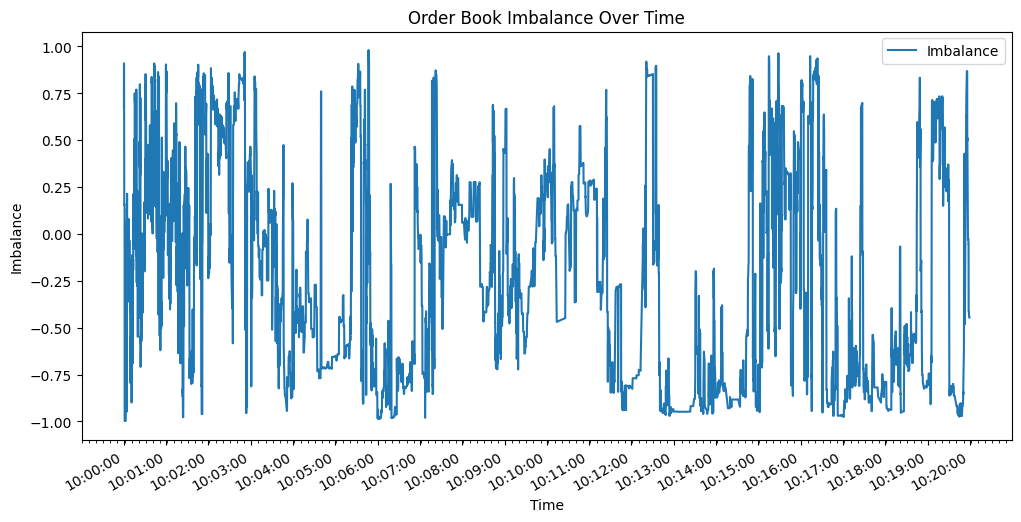

Locator attempting to generate 1319 ticks ([-25566.584016203702, ..., -25566.568761574075]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1319 ticks ([-25566.584016203702, ..., -25566.568761574075]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1319 ticks ([-25566.584016203702, ..., -25566.568761574075]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1319 ticks ([-25566.584016203702, ..., -25566.568761574075]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1319 ticks ([-25566.584016203702, ..., -25566.568761574075]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1319 ticks ([-25566.584016203702, ..., -25566.568761574075]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1319 ticks ([-25566.584016203702, ..., -25566.568761574075]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1319 ticks ([-25566.584016203702, ..., -25566

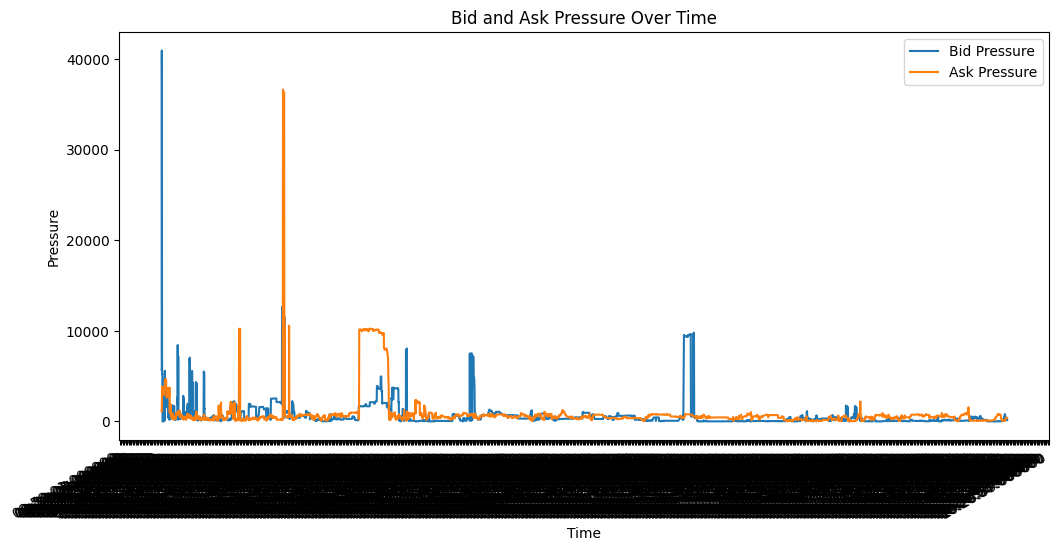

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

def visualize_data(final_df):
    """
    Visualize the data using matplotlib and seaborn.
    """
    # Set the timestamp as the index
    final_df = final_df.set_index('timestamp')

    # Plot Imbalance over Time
    plt.figure(figsize=(12, 6))
    plt.plot(final_df.index, final_df['imbalance'], label='Imbalance')
    plt.title('Order Book Imbalance Over Time')
    plt.xlabel('Time')
    plt.ylabel('Imbalance')
    plt.legend()

    # Set major and minor ticks format
    plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=1))  # Major ticks every 1 minute
    plt.gca().xaxis.set_minor_locator(mdates.SecondLocator(interval=10))  # Minor ticks every 10 seconds
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))  # Format major ticks as HH:MM:SS

    plt.gcf().autofmt_xdate()  # Rotate date labels to avoid overlap
    plt.show()

    # Plot Bid and Ask Pressure Over Time
    plt.figure(figsize=(12, 6))
    plt.plot(final_df.index, final_df['bid_pressure'], label='Bid Pressure')
    plt.plot(final_df.index, final_df['ask_pressure'], label='Ask Pressure')
    plt.title('Bid and Ask Pressure Over Time')
    plt.xlabel('Time')
    plt.ylabel('Pressure')
    plt.legend()

    # Set major and minor ticks format
    plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=2))  # Major ticks every 1 minute
    plt.gca().xaxis.set_minor_locator(mdates.SecondLocator(interval=1))  # Minor ticks every 10 seconds
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S.%f'))  # Format major ticks as HH:MM:SS

    plt.gcf().autofmt_xdate()  # Rotate date labels to avoid overlap
    plt.show()

# Example usage:
# Assuming final_df is your DataFrame with the necessary data
# final_df = ... (your DataFrame creation code here)

# Call the visualization function
visualize_data(final_df)